In [220]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [221]:
df = pd.read_csv('personality.csv')
df.drop(columns='Name', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       50 non-null     int64
 1   Active?                      50 non-null     int64
 2   Replies to comments?         50 non-null     int64
 3   Number of friends/followers  50 non-null     int64
 4   Personality                  50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


In [222]:
df.value_counts()

Post/Share Frequently?  Active?  Replies to comments?  Number of friends/followers  Personality
0                       0        0                     1000                         0              5
                                                       321                          0              2
1                       0        1                     1322                         1              1
                                 0                     1356                         1              1
                                                       1700                         1              1
                                 1                     780                          1              1
                                                       800                          1              1
                                                       933                          1              1
                                                       987                          1              1
                                                       1004                         1              1
                                                       1124                         1              1
                                                       1256                         1              1
0                       0        0                     228                          0              1
1                       0        0                     1300                         1              1
                                 1                     1789                         1              1
                                                       1800                         1              1
                                                       1902                         1              1
                                                       2000                         1              1
                                                       2082                         1              1
                                                       2234                         1              1
                                                       2600                         1              1
                                                       3200                         1              1
                                                       1606                         1              1
                                 0                     809                          1              1
                                                       1200                         0              1
0                       0        0                     1234                         0              1
                                                       328                          0              1
                                                       456                          0              1
                                                       559                          0              1
                                                       860                          0              1
                                                       890                          0              1
                                                       977                          0              1
                                                       982                          0              1
                                                       995                          0              1
                                                       1242                         0              1
1                       0        0                     802                          1              1
0                       0        0                     1300                         0              1
                                                       1432                         0              1
                                 1                     923        

In [223]:
x = df.drop(columns=['Personality']).values

In [224]:
x.shape

(50, 4)

In [225]:
y = df['Personality'].values

In [226]:
y.shape

(50,)

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2
                                                    )
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 4)
(40,)
(10, 4)
(10,)


In [228]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

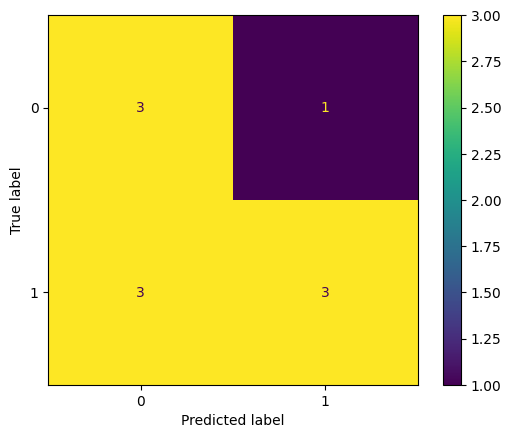

In [229]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

In [230]:
y_pred = knn.predict(X_test)

In [231]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.66666667 0.75      ]


In [232]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.72727273 0.66666667]


In [233]:
accuracy_score(y_test, y_pred)

0.7

In [234]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.8 0.6]


In [235]:
knn.predict([[0, 1, 0, 1000]])

array([0])